In [ ]:
import numpy as np
import time
import random
from math import ceil, log

In [ ]:
def create_matrix(dim,type):
  arr = np.zeros((dim,dim))
  for i in range(0,dim):
    for j in range(0,dim):
      if type == 'int':
        num = random.randint(0,11)
      elif type == 'float':
        num = random.uniform(0, 11)
      arr[i][j] = num
  return np.array(arr)


Square matric Multiply

In [ ]:
def smm(A, B):
        n = A.shape[0]
        C = np.zeros((n, n))
        C = C.astype(np.int64)
        for i in range(n):
            for j in range(n):
                C[i, j] = 0
                for k in range(n):
                    C[i, j] += A[i, k] * B[k, j]
        return C

Square Matrix Multiply Recursively

In [ ]:
def square_matrix_multiply_recursive(A, B):
        n = A.shape[0]
        C = np.zeros((n, n))
        C = C.astype(np.float64)
        if n == 1:
            C[0, 0] = A[0, 0] * B[0, 0]
        else:
            half_n = int(n / 2)
            C[0 : half_n, 0 : half_n] = square_matrix_multiply_recursive(A[0 : half_n, 0 : half_n], B[0 : half_n, 0 : half_n]) + square_matrix_multiply_recursive(A[0 : half_n, half_n : n], B[half_n : n, 0 : half_n])
            C[0 : half_n, half_n : n] = square_matrix_multiply_recursive(A[0 : half_n, 0 : half_n], B[0 : half_n, half_n : n]) + square_matrix_multiply_recursive(A[0 : half_n, half_n : n], B[half_n : n, half_n : n])
            C[half_n : n, 0 : half_n] = square_matrix_multiply_recursive(A[half_n : n, 0 : half_n], B[0 : half_n, 0 : half_n]) + square_matrix_multiply_recursive(A[half_n : n, half_n : n], B[half_n : n, 0 : half_n])
            C[half_n : n, half_n : n] = square_matrix_multiply_recursive(A[half_n : n, 0 : half_n], B[0 : half_n, half_n : n]) + square_matrix_multiply_recursive(A[half_n : n, half_n : n], B[half_n : n, half_n : n])
        return C


Strattens method

In [ ]:
def square_matrix_multiply_recursive_strassen(A, B):
        n = A.shape[0]
        C = np.zeros((n, n))
        C = C.astype(np.float64)
        if n == 1:
            C[0, 0] = A[0, 0] * B[0, 0]
        else:
            half_n = int(n / 2)
            # Sums
            s0 = B[0 : half_n, half_n : n] - B[half_n : n, half_n : n]
            s1 = A[0 : half_n, 0 : half_n] + A[0 : half_n, half_n : n]
            s2 = A[half_n : n, 0 : half_n] + A[half_n : n, half_n : n]
            s3 = B[half_n : n, 0 : half_n] - B[0 : half_n, 0 : half_n]
            s4 = A[0 : half_n, 0 : half_n] + A[half_n : n, half_n : n]
            s5 = B[0 : half_n, 0 : half_n] + B[half_n : n, half_n : n]
            s6 = A[0 : half_n, half_n : n] - A[half_n : n, half_n : n]
            s7 = B[half_n : n, 0 : half_n] + B[half_n : n, half_n : n]
            s8 = A[0 : half_n, 0 : half_n] - A[half_n : n, 0 : half_n]
            s9 = B[0 : half_n, 0 : half_n] + B[0 : half_n, half_n : n]
            # Product of numbers
            p0 = square_matrix_multiply_recursive_strassen(A[0 : half_n, 0 : half_n], s0)
            p1 = square_matrix_multiply_recursive_strassen(s1, B[half_n : n, half_n : n])
            p2 = square_matrix_multiply_recursive_strassen(s2, B[0 : half_n, 0 : half_n])
            p3 = square_matrix_multiply_recursive_strassen(A[half_n : n, half_n : n], s3)
            p4 = square_matrix_multiply_recursive_strassen(s4, s5)
            p5 = square_matrix_multiply_recursive_strassen(s6, s7)
            p6 = square_matrix_multiply_recursive_strassen(s8, s9)
            # Parts of the new matrix equal summatrices
            C[0 : half_n, 0 : half_n] = p4 + p3 - p1 + p5
            C[0 : half_n, half_n : n] = p0 + p1
            C[half_n : n, 0 : half_n] = p2 + p3
            C[half_n : n, half_n : n] = p4 + p0 - p2 - p6
        return C 

# Running time analysis

1.Collect Runtime data and plot

Testing algorithms first on only powers of 2

In [ ]:
def get_runtime_smm(n):
  rtime = []
  llist = []
  for i in range(2,n):
    A = create_matrix(2**i)
    B = create_matrix(2**i)
    t0 = time.time()
    smm(A,B)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
def get_runtime_smmr(n):
  rtime = []
  llist = []
  for i in range(2,n):
    A = create_matrix(2**i)
    B = create_matrix(2**i)
    t0 = time.time()
    square_matrix_multiply_recursive(A,B)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
def get_runtime_strassen(n):
  rtime = []
  llist = []
  for i in range(2,n):
    A = create_matrix(2**i)
    B = create_matrix(2**i)
    t0 = time.time()
    square_matrix_multiply_recursive_strassen(A,B)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
runtime_smm, list_smm = get_runtime_smm(10)

In [ ]:
runtime_smmr, list_smmr = get_runtime_smmr(10)

In [ ]:
runtime_strassen, list_strassen = get_runtime_strassen(10)

In [ ]:
runtime_smm

[0.0005819797515869141,
 0.0038466453552246094,
 0.01379847526550293,
 0.11771941184997559,
 0.9123685359954834,
 7.245117902755737,
 57.568323612213135,
 452.9518346786499]

In [ ]:
runtime_smmr

[0.0005974769592285156,
 0.004620790481567383,
 0.0170745849609375,
 0.1320343017578125,
 1.1052844524383545,
 8.692685842514038,
 67.65030217170715,
 538.9333045482635]

In [ ]:
runtime_strassen

[0.0010759830474853516,
 0.011226177215576172,
 0.01531839370727539,
 0.12060236930847168,
 0.7752599716186523,
 5.217729806900024,
 37.18712663650513,
 262.749968290329]

In [ ]:
for l in list_smm:
  l = 2**l
for l in list_smmr:
  l = 2**l
for l in list_strassen:
  l = 2**l

In [ ]:
import matplotlib.pyplot as plt

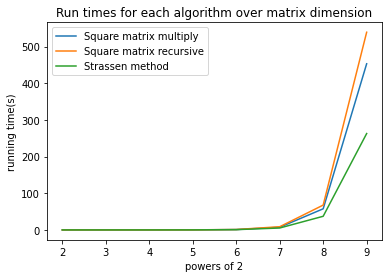

In [ ]:
plt.plot(list_smm,runtime_smm)
plt.plot(list_smmr,runtime_smmr)
plt.plot(list_strassen,runtime_strassen)
plt.title('Run times for each algorithm over matrix dimension')
plt.xlabel('powers of 2')
plt.ylabel('running time(s)')
plt.legend(["Square matrix multiply", "Square matrix recursive","Strassen method"])

Recursive has worse time becuase of overhead.

Get runtimes of non square dimensions which were padded to become squares

In [ ]:
def check_if_powerOf2_matrix(matrix):
  n = matrix.shape[0]
  nextPowerTwo = lambda n: 2 ** int(ceil(log(n, 2)))
  m = nextPowerTwo(n)
  tot = m-n
  matrix = np.pad(matrix,((0,tot),(0,tot)))
  return matrix

In [ ]:
def get_runtime_smm2():
  rtime = []
  llist = []
  dim_list = [3, 6, 12, 24, 48, 96, 192]
  for i in dim_list:
    A = create_matrix(i,'int')
    B = create_matrix(i,'int')
    Ap = check_if_powerOf2_matrix(A)
    Bp = check_if_powerOf2_matrix(B)
    t0 = time.time()
    smm(Ap,Bp)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
def get_runtime_smmr2():
  rtime = []
  llist = []
  dim_list = [3, 6, 12, 24, 48, 96, 192]
  for i in dim_list:
    A = create_matrix(i,'int')
    B = create_matrix(i,'int')
    Ap = check_if_powerOf2_matrix(A)
    Bp = check_if_powerOf2_matrix(B)
    t0 = time.time()
    square_matrix_multiply_recursive(Ap,Bp)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
def get_runtime_strassen2():
  rtime = []
  llist = []
  dim_list = [3, 6, 12, 24, 48, 96, 192]
  for i in dim_list:
    A = create_matrix(i,'int')
    B = create_matrix(i,'int')
    Ap = check_if_powerOf2_matrix(A)
    Bp = check_if_powerOf2_matrix(B)
    t0 = time.time()
    square_matrix_multiply_recursive_strassen(Ap,Bp)
    t1 = time.time()
    tot = t1-t0
    rtime.append(tot)
    llist.append(i)
  return rtime, llist

In [ ]:
runtime_smm2, list_smm2 = get_runtime_smm2()

In [ ]:
runtime_smmr2, list_smmr2 = get_runtime_smmr2()

In [ ]:
runtime_strassen2, list_strassen2 = get_runtime_strassen2()

In [ ]:
runtime_smm2

[0.0005033016204833984,
 0.0032744407653808594,
 0.013918638229370117,
 0.1146993637084961,
 0.9193108081817627,
 7.067389488220215,
 55.5192985534668]

In [ ]:
runtime_smmr2

[0.00060272216796875,
 0.007300376892089844,
 0.018898487091064453,
 0.1363201141357422,
 1.0886452198028564,
 8.303098917007446,
 66.39112949371338]

In [ ]:
runtime_strassen2

[0.0015239715576171875,
 0.009991884231567383,
 0.014560222625732422,
 0.10950326919555664,
 0.7440929412841797,
 5.464939594268799,
 37.91157412528992]

In [ ]:
dim_list = [3, 6, 12, 24, 48, 96, 192]

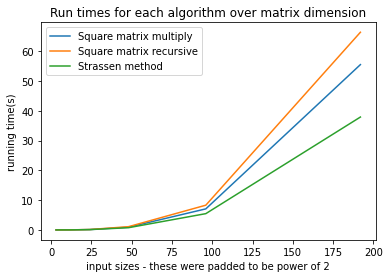

In [ ]:
 plt.plot(dim_list,runtime_smm2)
 plt.plot(dim_list,runtime_smmr2)
 plt.plot(dim_list,runtime_strassen2)
 plt.title('Run times for each algorithm over matrix dimension')
 plt.xlabel('input sizes - these were padded to be power of 2')
 plt.ylabel('running time(s)')
 plt.legend(["Square matrix multiply", "Square matrix recursive","Strassen method"])

3.Changing matrices types